In [1]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os

Plot cluster number and size depending on mechanisms of interaction.

In [2]:
file_path = '/Users/timrudge/cellmodeller/data'

# Location of the data we want to analyse,
folders = [
    'Wc__0__psi__0__ftax__0__1000_cells-20-07-19-17-16',
    'Wc__0__psi__0__ftax__1__1000_cells-20-07-19-17-18',
    'Wc__0__psi__1__ftax__0__1000_cells-20-07-19-17-19',
    'Wc__0__psi__1__ftax__1__1000_cells-20-07-19-17-20',
    'Wc__0_5__psi__0__ftax__0__1000_cells-20-07-19-17-21',
    'Wc__0_5__psi__0__ftax__1__1000_cells-20-07-19-17-23',
    'Wc__0_5__psi__1__ftax__0__1000_cells-20-07-19-17-24',
    'Wc__0_5__psi__1__ftax__1__1000_cells-20-07-19-17-26'
]
# For the legend,
short_names = [
    'Random walk',
    'Chemotaxis',
    'CIL',
    'CIL + Chemo.',
    'Adhesion',
    'Adh. + Chemo.',
    'Adh. + CIL',
    'Adh. + CIL + Chemo.'
]

mean_sizes_all = []
number_all = []
for folder in folders:
    mean_sizes = []
    number = []
    fname = os.path.join(file_path, folder, 'step-%05d.pickle')
    # Look at the first 400 time steps of this simulation
    for t in range(0,400):
        # Get the cell states
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
        # Construct a graph with cells as nodes and cell-cell contacts as edges
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)
        # Get the sizes of the connected components = clusters
        sizes = [len(c) for c in nx.connected_components(G)]
        if len(sizes)>0:
            mean_size = np.max(sizes)
            mean_sizes.append(mean_size)
        else:
            mean_sizes.append(0)
        # Count the number of clusters
        number.append(nx.number_connected_components(G))
    mean_sizes_all.append(mean_sizes)
    number_all.append(number)
    
# Make the list of lists into a 2D array
mean_sizes_all = np.array(mean_sizes_all).transpose()
number_all = np.array(number_all).transpose()

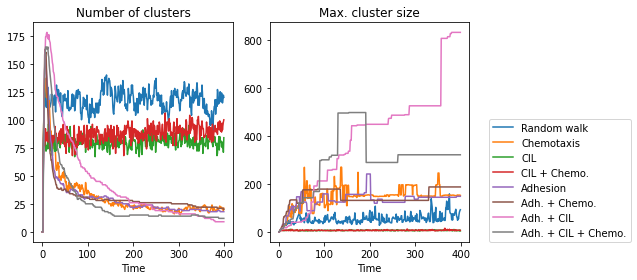

In [26]:
fig, axs = plt.subplots(1,2, figsize=(9,4), sharex=True)
axs[0].plot(number_all)
axs[0].set_title('Number of clusters')
axs[0].set_xlabel('Time')

axs[1].plot(mean_sizes_all)
axs[1].legend(short_names, loc=(1.1,0))
axs[1].set_title('Max. cluster size')
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.savefig('cluster_analysis.png', dpi=300)

Look at cluster size as a function of density.

In [7]:
file_path = '/Users/timrudge/cellmodeller/data'
folders = [
    'Wc__0_5__psi__1__ftax__1__100_cells-20-07-19-16-47',
    'Wc__0_5__psi__1__ftax__1__200_cells-20-07-19-16-47',
    'Wc__0_5__psi__1__ftax__1__400_cells-20-07-19-16-46',
    'Wc__0_5__psi__1__ftax__1__800_cells-20-07-19-16-45',
    'Wc__0_5__psi__1__ftax__1__1600_cells-20-07-19-16-43',
]
n_cells = np.array([100,200,400,800,1600])
n_cells = (np.sqrt(n_cells)).astype(np.int32) ** 2
density = np.pi*n_cells/(80*80)
short_names = ['$\phi=%.1g$'%d for d in density]

mean_relative_sizes_all = []
number_all = []
for N,folder in zip(n_cells,folders):
    mean_relative_sizes = []
    number = []
    fname = os.path.join(file_path, folder, 'step-%05d.pickle')
    for t in range(0,400):
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)
        sizes = [len(c) for c in nx.connected_components(G)]
        if len(sizes)>0:
            mean_relative_size = np.max(sizes) / N
            mean_relative_sizes.append(mean_relative_size)
        else:
            mean_relative_sizes.append(0)
        number.append(nx.number_connected_components(G))
    mean_relative_sizes_all.append(mean_relative_sizes)
    number_all.append(number)
    
mean_relative_sizes_all = np.array(mean_relative_sizes_all).transpose()
number_all = np.array(number_all).transpose()

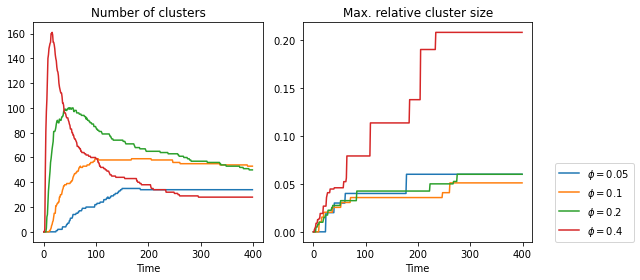

In [11]:
fig, axs = plt.subplots(1,2, figsize=(9,4), sharex=True)
axs[0].plot(number_all[:,:-1])
axs[0].set_title('Number of clusters')
axs[0].set_xlabel('Time')

axs[1].plot(mean_relative_sizes_all[:,:-1])
axs[1].legend(short_names, loc=(1.1,0))
axs[1].set_title('Max. relative cluster size')
axs[1].set_xlabel('Time')

plt.tight_layout()
plt.savefig('cluster_density_analysis.png', dpi=300)

In [6]:
print(mean_relative_sizes_all.shape)

(400, 5)


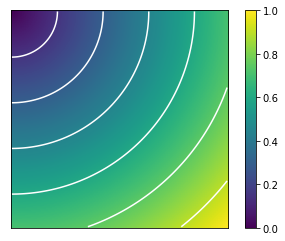

In [24]:
x,y = np.meshgrid(np.arange(0,100), np.arange(0,100))
r = np.sqrt(x*x + y*y)
r = r/np.max(r)
plt.imshow(r)
plt.colorbar()
plt.contour(r, colors='w')
plt.xticks([])
plt.yticks([])
plt.savefig('gradient.png', dpi=300)